# Analysis

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats.stats import pearsonr


%matplotlib inline

df = pd.read_csv("dataset/train.csv")

A little overview

In [97]:
df.head(3)

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22


The dimension of the dataframe

In [98]:
df.shape
n_instances, n_features = df.shape

So, there are **36** features and **523021** instances

## Features

The features are: 


 * **StoreID** : Store ID,
 * **Date** : Observation Date,
 * **IsHoliday** : Regional Holiday,
 * **IsOpen** : Store Open,
 * **HasPromotions** : The Store is currently running promotions,
 * **StoreType** : Type of Store (Standard Market, Super Market, Hyper Market, Shopping Centre),
 * **AssortmentType** : Type of Products (General, With Fish Department, With Non-Food Department),
 * **NearestCompetitor** : Distance (meters) to the nearest competitor store,
 * **Region** : Region ID ,
 * **NumberOfCustomers** : Number of Customer,
 * **NumberOfSales** :Number of Products Sold **(Target Value)**,
 * **Region_AreaKM2** : Region Size in which the Store is located (Km<sup>2</sup>),
 * **Region_GDP** : Region Gross Domestic Product,
 * **Region_PopulationK** : Region Population Size (k),
 * **CloudCover** : LevelofCovering(0-9),
 * **Events** : Meteorological event,
 * **Max_Dew_PointC** : Max Dew Point (Celsius),
 * **Max_Gust_SpeedKm_h** : Max Gust Speed (Km/h),
 * **Max_Humidity** : Max Humidity, 
 * **Max_Sea_Level_PressurehPa** : Max Pressure (hPa),
 * **Max_TemperatureC** : Max Temperature (Celsius),
 * **Max_VisibilityKm** : Max Visibility (Km),
 * **Max_Wind_SpeedKm_h** : Max Wind Speed (Km/h),
 * **Mean_Dew_PointC** : Mean Dew Point (Celsius),
 * **Mean_Humidity** : Mean Humidity,
 * **Mean_Sea_Level_PressurehPa** : Mean Pressure (hPa),
 * **Mean_TemperatureC** : Mean Temperature (Celsius),
 * **Mean_VisibilityKm** : Mean Visibility (Km),
 * **Mean_Wind_SpeedKm_h** : Mean Window Speed (Km/h),
 * **Min_Dew_PointC** : Min Dew Point (Celsius),
 * **Min_Humidity** : Min Humidity,
 * **Min_Sea_Level_PressurehPa** : Min Pressure (hPa),
 * **Min_TemperatureC** : Min Temperature (Celsius),
 * **Min_VisibilitykM** : Min Visibility (Km),
 * **Precipitationmm** : Precipitation Amount (mm),
 * **WindDirDegrees** : Window Direction (degrees).
 
 

In [99]:
categorical_variables_mask = df.dtypes==object
categorical_variables = df.columns[categorical_variables_mask]
numerical_variables = df.columns[~categorical_variables_mask]
print("%d Categorical Variables\n%d Numerical Variables\n"%(len(categorical_variables),len(numerical_variables)))

4 Categorical Variables
32 Numerical Variables



## Missing values

The numbers of null values for each columns is:

In [100]:
missing_values = round(df.isnull().sum() / n_instances * 100, 3)
features_with_missings = missing_values.drop(missing_values[missing_values == 0].index).sort_values(ascending=False)
features_with_missings

Max_Gust_SpeedKm_h    78.381
Events                23.727
CloudCover             7.874
Min_VisibilitykM       2.168
Mean_VisibilityKm      2.168
Max_VisibilityKm       2.168
dtype: float64

## Dealing the missing values

We can try to understand what happens if we delete the instances or the rows that contain missing values.

First of all we try to delete the instances that have one or more missing values.

In [101]:
df_deleted_rows = df.dropna(axis=0)
cleaned_rows_number = df_deleted_rows.shape[0] 
print("After cleaning, %d instances remain"%cleaned_rows_number)
percentage_lost = round(((n_instances - cleaned_rows_number) / n_instances)*100, 2)
print("We loose about %.2f%% percentage of instances" %percentage_lost)

After cleaning, 94443 instances remain
We loose about 81.94% percentage of instances


Now, we can try to delete the features that contain missing values. 

In [102]:
df_deleted_columns = df.dropna(axis=1)
cleaned_columns_number = df_deleted_columns.shape[1]
print("After cleaning, %d features remain"%cleaned_columns_number)
print("We loose 6 features")

After cleaning, 30 features remain
We loose 6 features


Since the deleted features are not so essential, it's convenient to use the **cleaned set of features** and **any imputation strategy should be used** for dealing with missing values.

## Data exploration

First of all, we analyse the distribution of the target value, **NumberOfSales**

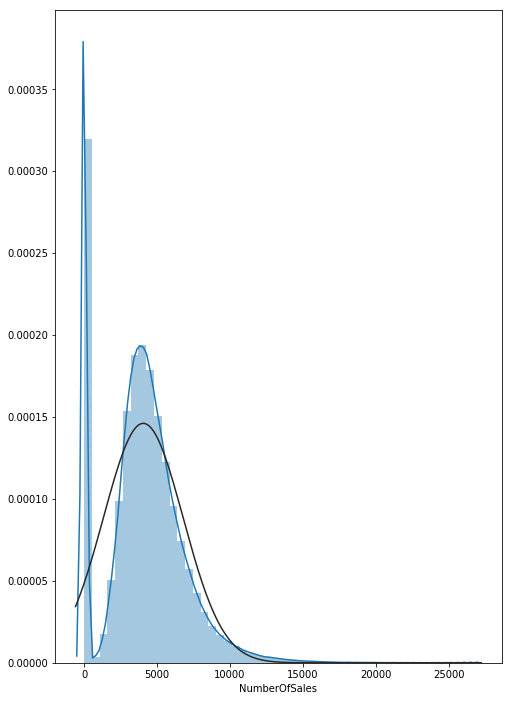

In [108]:
matplotlib.rcParams['figure.figsize'] = (8.0, 12.0)
# fit the data with a normal distribution and 
sns.distplot(df['NumberOfSales'] , fit=norm)